In [1]:
import pandas as pd
carsales = pd.read_csv('carsales.csv')

In [2]:
carsales.head()

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0


In [3]:
# shorten second column name
carsales.columns = ['month', 'sales']

In [4]:
carsales.tail()

,month,sales
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0
108,Monthly car sales in Quebec 1960-1968,NaN


In [5]:
carsales.shape

(109, 2)

In [6]:
# The last row is not sales data information so we shall remove it
carsales = carsales.loc[0:107,:].copy()

In [7]:
# check using tail again
carsales.tail()

,month,sales
103,1968-08,16722.0
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0


In [8]:
carsales['period'] = list(range(108))

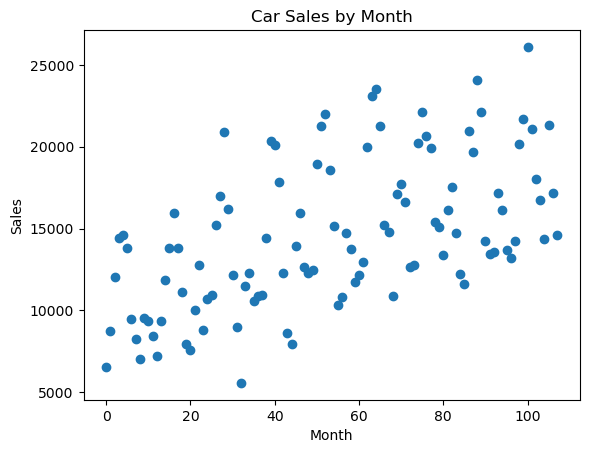

In [9]:
# Let's draw a plot
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(carsales['period'], carsales['sales'])
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [10]:
x = carsales['period'].values.reshape(-1,1)
y = carsales['sales'].values.reshape(-1,1)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [12]:
regressor.coef_

array([[81.20250174]])

In [13]:
regressor.intercept_

array([10250.77726809])

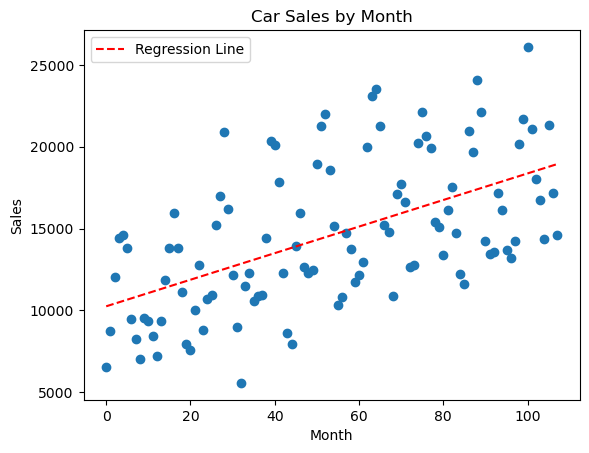

In [14]:
plt.scatter(carsales['period'], carsales['sales'])
plt.plot(carsales['period'], [81.2 * i + 10250.0 for i in carsales['period']],'r--', label='Regression Line')
plt.legend(loc="upper left")
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

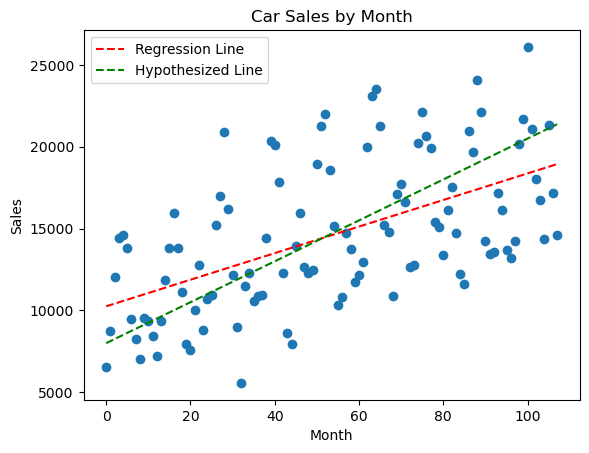

In [15]:
# Add our hypothetical line
plt.scatter(carsales['period'], carsales['sales'])
plt.plot(carsales['period'], [81.2 * i + 10250.0 for i in carsales['period']],'r--', label='Regression Line')
plt.plot(carsales['period'], [125 * i + 8000 for i in carsales['period']],'g--', label='Hypothesized Line')
plt.legend(loc="upper left")
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [32]:
# Let’s calculate those error measurements for our car sales regression
saleslist=carsales['sales'].tolist()
regressionline=[81.2 * i + 10250.8 for i in carsales['period']]
hypothesizedline=[125 * i + 8000 for i in carsales['period']]
error1=[(x-y) for x, y in zip(regressionline,saleslist)]
error2=[(x-y) for x, y in zip(hypothesizedline,saleslist)]

In [34]:
error1

[3700.7999999999993,
 1604.0,
 -1612.800000000001,
 -3900.6000000000004,
 -4011.4000000000015,
 -3134.2000000000007,
 1240.0,
 2568.199999999999,
 3851.3999999999996,
 1436.5999999999985,
 1698.7999999999993,
 2688.0,
 3988.199999999999,
 1932.3999999999996,
 -449.40000000000146,
 -2315.2000000000007,
 -4376.0,
 -2189.800000000001,
 569.3999999999996,
 3818.5999999999985,
 4264.799999999999,
 1941.0,
 -721.8000000000011,
 3302.3999999999996,
 1522.5999999999985,
 1333.7999999999993,
 -2838.0,
 -4566.800000000001,
 -8375.6,
 -3599.4000000000015,
 543.7999999999993,
 3771.0,
 7281.199999999999,
 1456.3999999999996,
 755.5999999999985,
 2509.7999999999993,
 2312.0,
 2290.199999999999,
 -1068.6000000000004,
 -6961.4000000000015,
 -6629.200000000001,
 -4236.0,
 1393.199999999999,
 5100.4,
 5861.5999999999985,
 -27.200000000000728,
 -1950.0,
 1439.199999999999,
 1881.3999999999996,
 1759.5999999999985,
 -4633.200000000001,
 -6867.0,
 -7541.799999999999,
 -4026.6000000000004,
 -539.4000000000

In [36]:
import numpy as np

In [38]:
error1abs = [abs(value) for value in error1]
error2abs = [abs(value) for value in error2]

In [40]:
np.mean(error1abs)

3154.3592592592595

In [42]:
np.mean(error2abs)

3239.777777777778

### The regression line fits the data better than our hypothesized line

In [45]:
error1squared = [(value)**2 for value in error1]
error2squared = [(value)**2 for value in error2]

In [49]:
np.sqrt(np.mean(error1squared))

3725.491219512759

In [53]:
np.sqrt(np.mean(error2squared))

3968.900519455399

In [55]:
def get_mae(line,actual):
    error=[(x-y) for x,y in zip(line,actual)]
    errorabs=[abs(value) for value in error]
    mae=np.mean(errorabs)
    return(mae)

In [57]:
def get_rmse(line,actual):
    error=[(x-y) for x,y in zip(line,actual)]
    errorsquared=[(value)**2 for value in error]
    rmse=np.sqrt(np.mean(errorsquared))
    return(rmse)

In [59]:
get_rmse(regressionline,saleslist)

3725.491219512759

In [61]:
get_rmse(hypothesizedline,saleslist)

3968.900519455399

In [63]:
x_extended = np.append(carsales['period'], np.arange(108, 116))

In [69]:
x_extended = x_extended.reshape(-1,1)
extended_prediction = regressor.predict(x_extended)

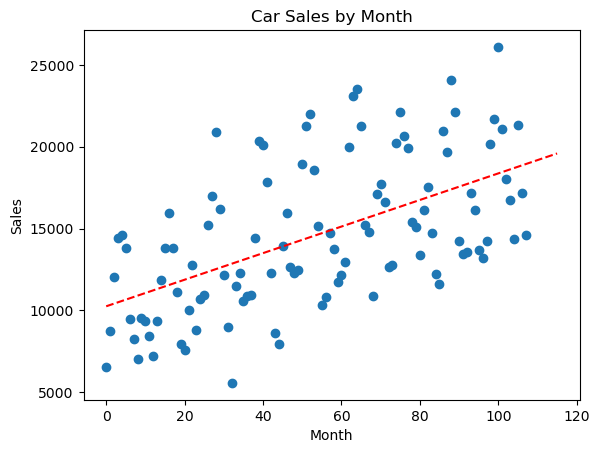

In [71]:
plt.scatter(carsales['period'], carsales['sales'])
plt.plot(x_extended, extended_prediction, 'r--')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [73]:
carsales['quadratic'] = carsales['period'].apply(lambda x: x**2)
carsales['cubic'] = carsales['period'].apply(lambda x: x**3)

In [75]:
x3 = carsales.loc[:, ['period', 'quadratic', 'cubic']].values.reshape(-1,3)

In [77]:
x3

array([[      0,       0,       0],
       [      1,       1,       1],
       [      2,       4,       8],
       [      3,       9,      27],
       [      4,      16,      64],
       [      5,      25,     125],
       [      6,      36,     216],
       [      7,      49,     343],
       [      8,      64,     512],
       [      9,      81,     729],
       [     10,     100,    1000],
       [     11,     121,    1331],
       [     12,     144,    1728],
       [     13,     169,    2197],
       [     14,     196,    2744],
       [     15,     225,    3375],
       [     16,     256,    4096],
       [     17,     289,    4913],
       [     18,     324,    5832],
       [     19,     361,    6859],
       [     20,     400,    8000],
       [     21,     441,    9261],
       [     22,     484,   10648],
       [     23,     529,   12167],
       [     24,     576,   13824],
       [     25,     625,   15625],
       [     26,     676,   17576],
       [     27,     729,   

In [81]:
y = carsales['sales'].values.reshape(-1,1)

In [83]:
regressor_cubic = LinearRegression()
regressor_cubic.fit(x3, y)

LinearRegression()

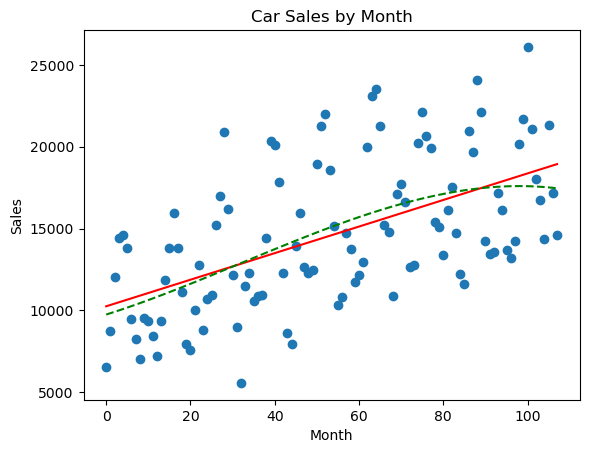

In [91]:
plt.scatter(carsales['period'],carsales['sales'])
plt.plot(x, regressor.predict(x), 'r-')
plt.plot(x,regressor_cubic.predict(x3),'g--')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [93]:
print(regressor_cubic.coef_)
print(regressor_cubic.intercept_)

[[ 8.13410634e+01  7.90279561e-01 -8.19451188e-03]]
[9746.41276055]
